<a href="https://colab.research.google.com/github/scudilio/CursoDDS/blob/main/Modulo_6_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://www.etonline.com/sites/default/files/styles/video_1920x1080/public/images/2017-01/titanic_vidpic_013117_1280Copy2.jpg)

# **Explorando os dados dos sobreviventes no Titanic**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url1 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv'
url2 = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv'
titanic = pd.read_csv(url1)
teste = pd.read_csv(url2) 

In [ ]:
# lista dos datasets no quais devemos fazer modificações

In [ ]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
596,597,1,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,NaN,S
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


 
## Análise Exploratória de Dados Básica
 


**Objetivos:**

- Entender a natureza dos dados
- Verificar quais variáveis vão me ajudar e quais não vão (e que possivelmente possam ser descartadas)
- Preparar uma solução básica via heurística


In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz 

In [ ]:
eda_titanic = sweetviz.analyze(titanic)
eda_titanic.show_html() 


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda_teste = sweetviz.analyze(teste)
eda_teste.show_html() 


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
eda2 = sweetviz.compare_intra(titanic, titanic['Survived'] == 0, ['Vítima', 'Sobrevivente'])
eda2.show_html()


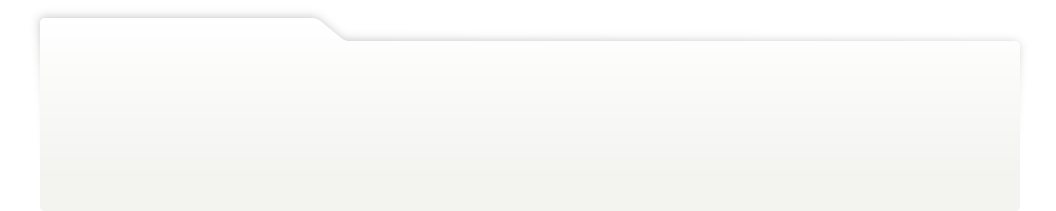
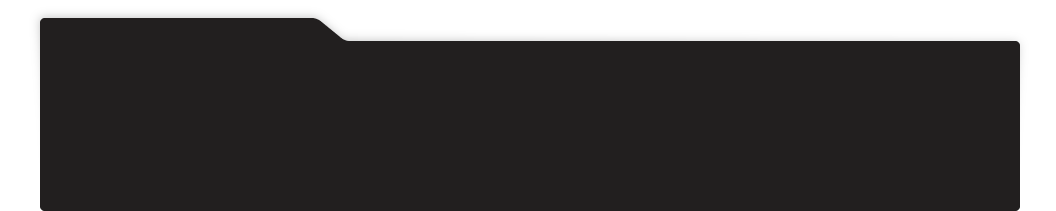
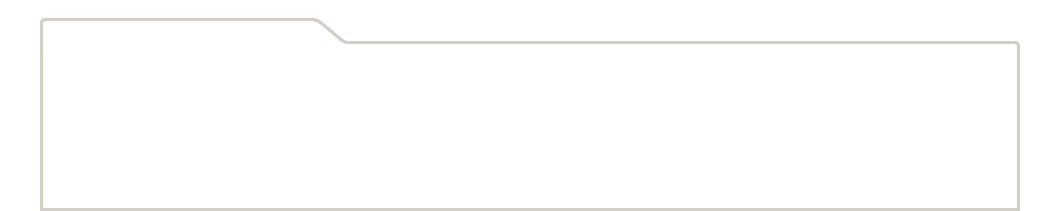
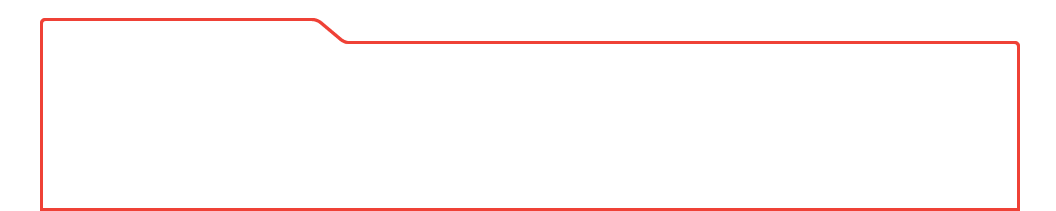
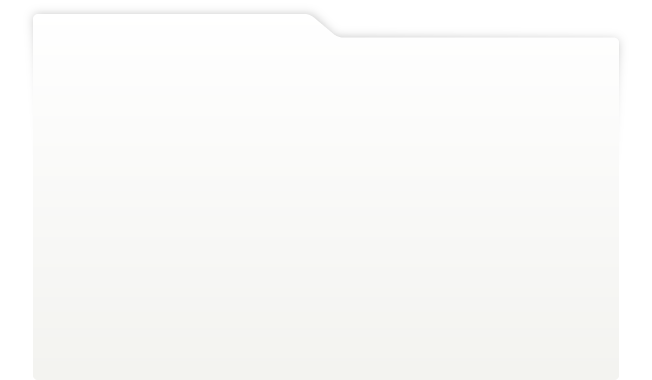
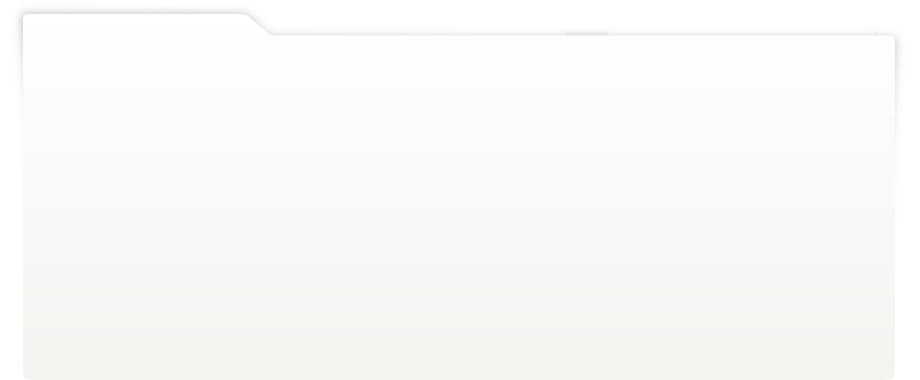
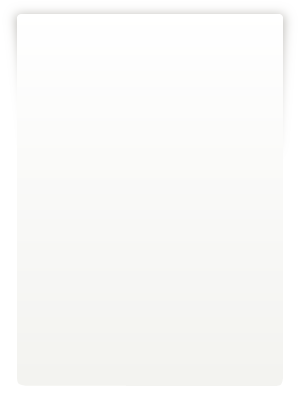
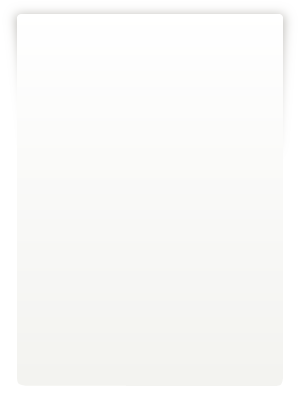
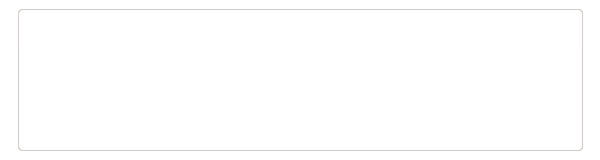
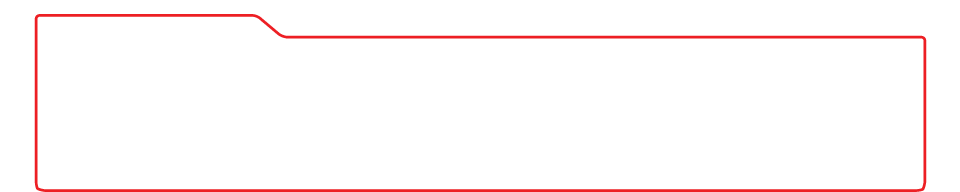
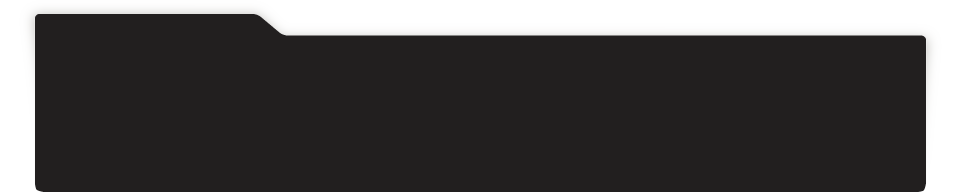
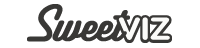
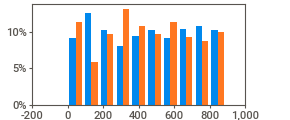
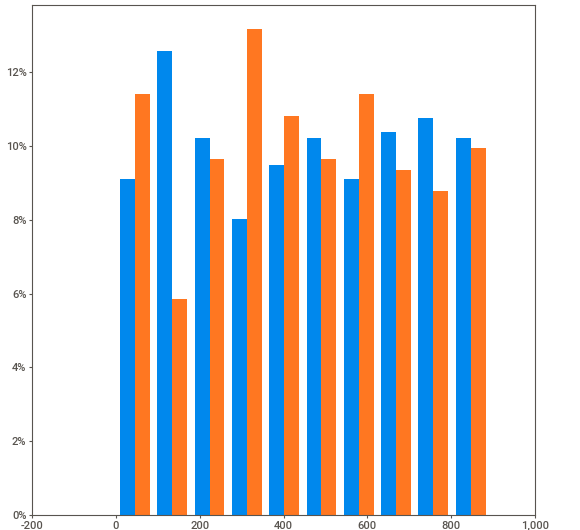
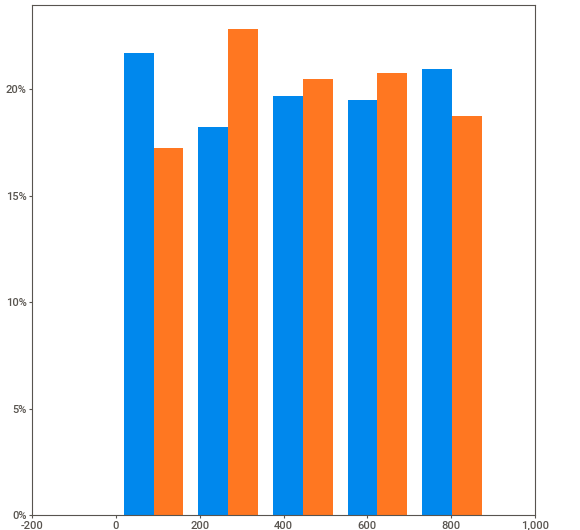
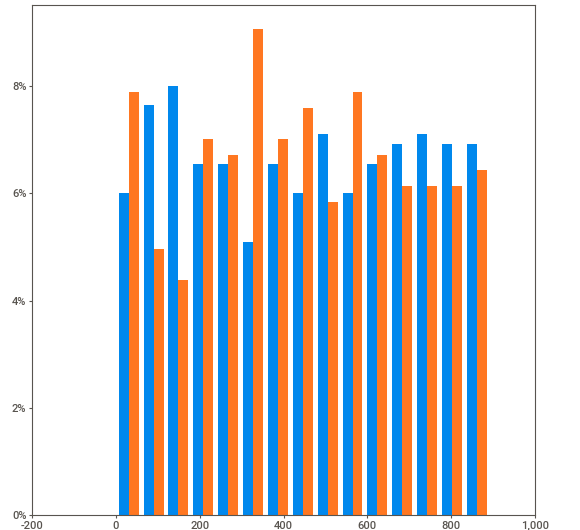
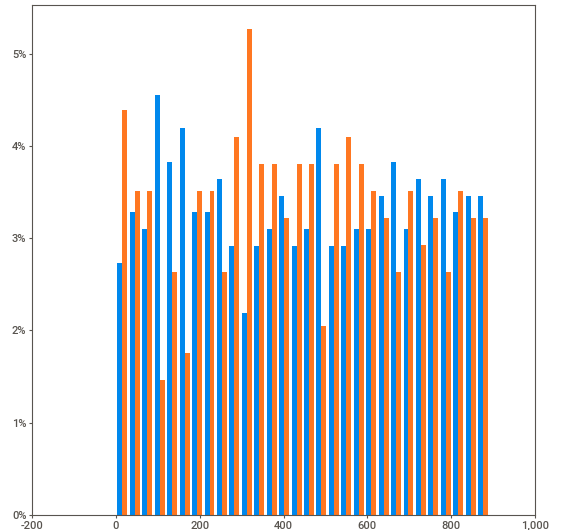
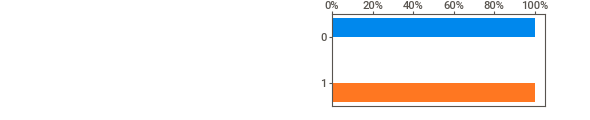
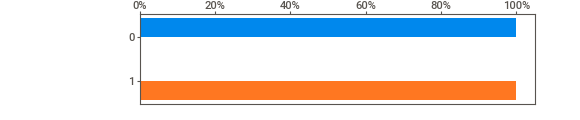
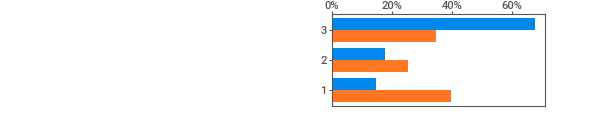
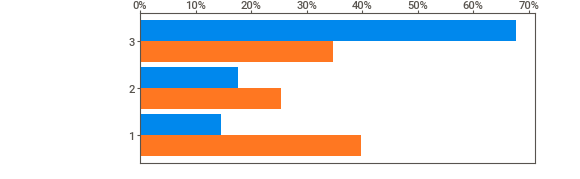
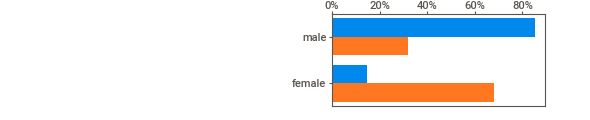
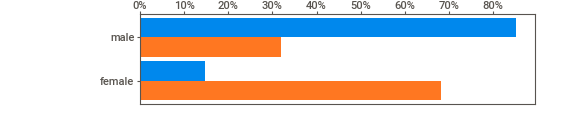
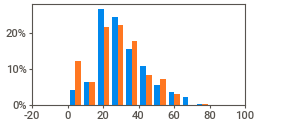
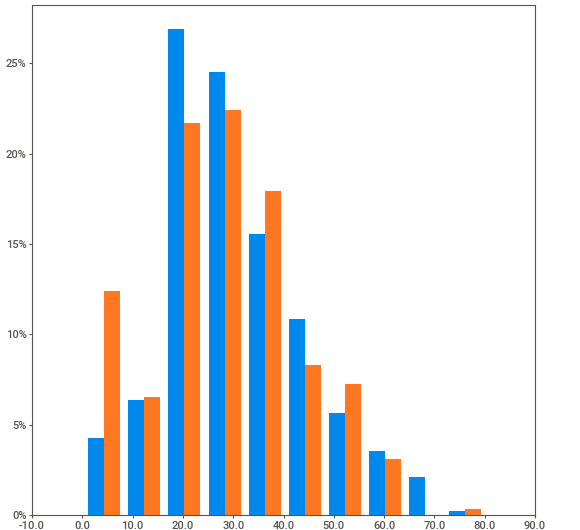
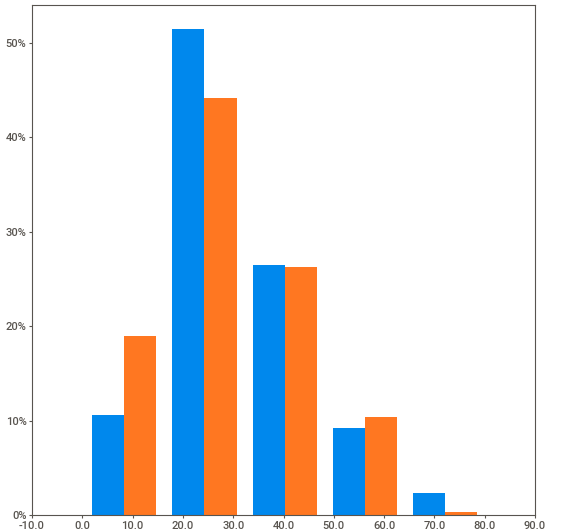
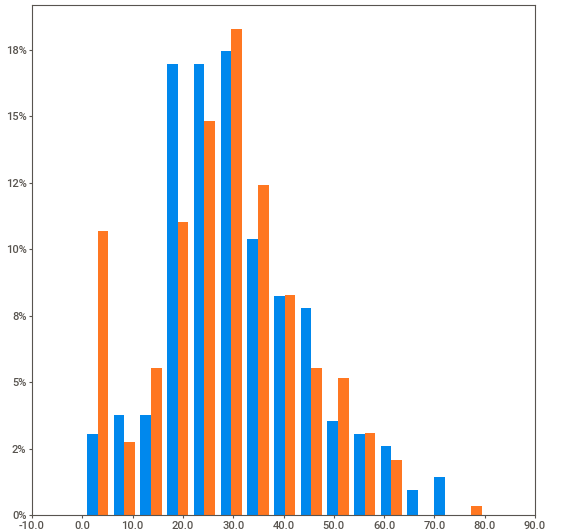
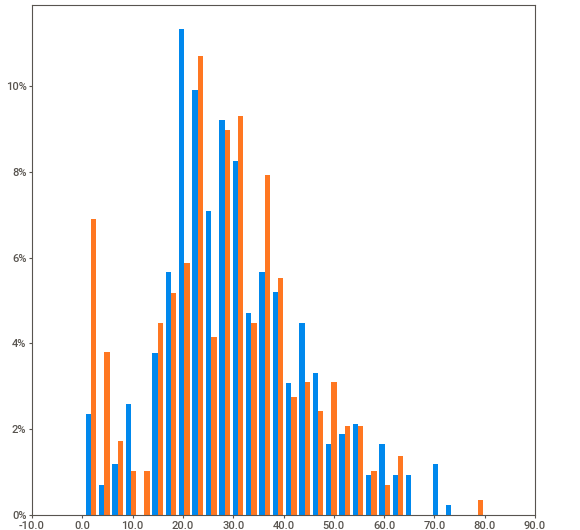
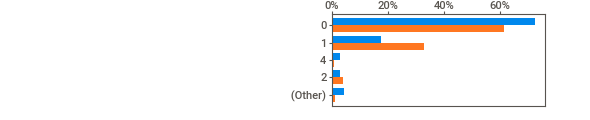
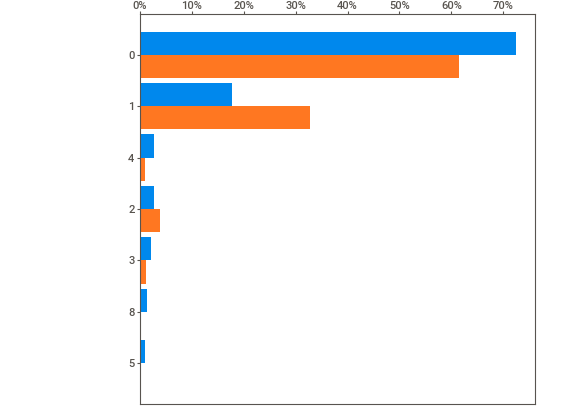
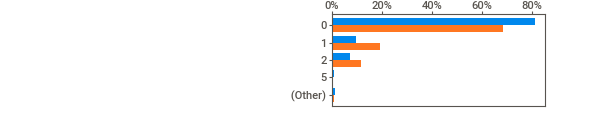
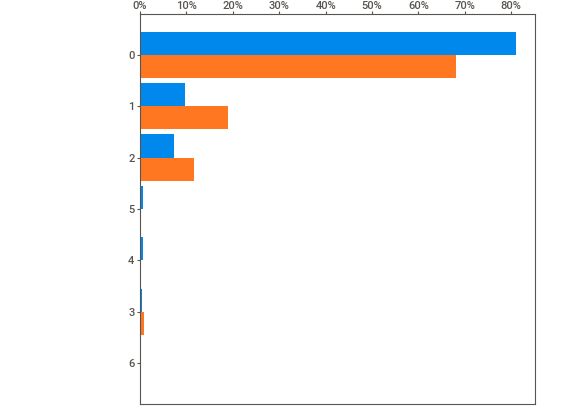
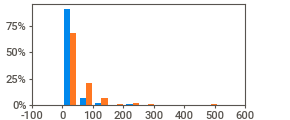
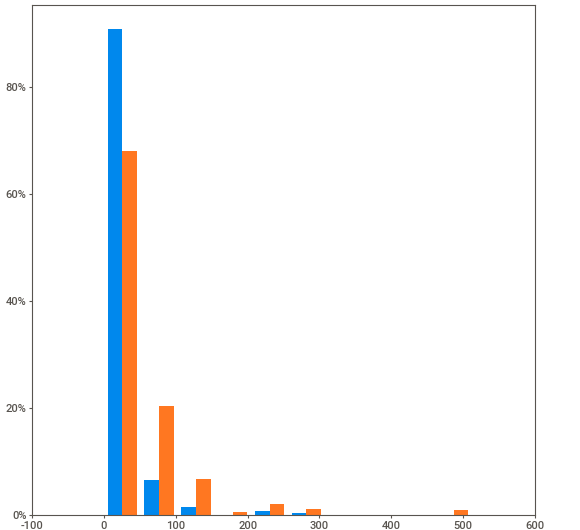
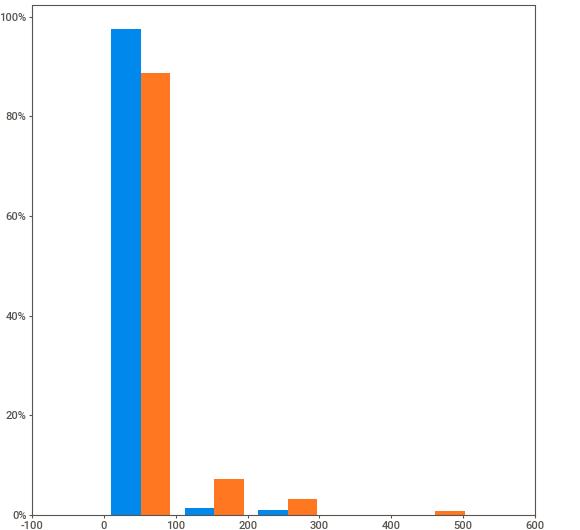
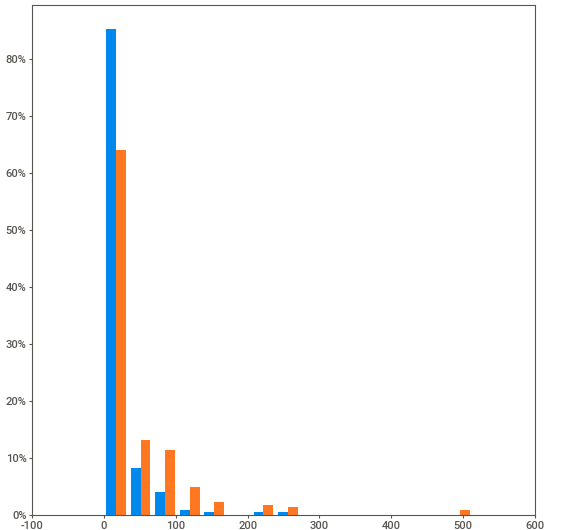
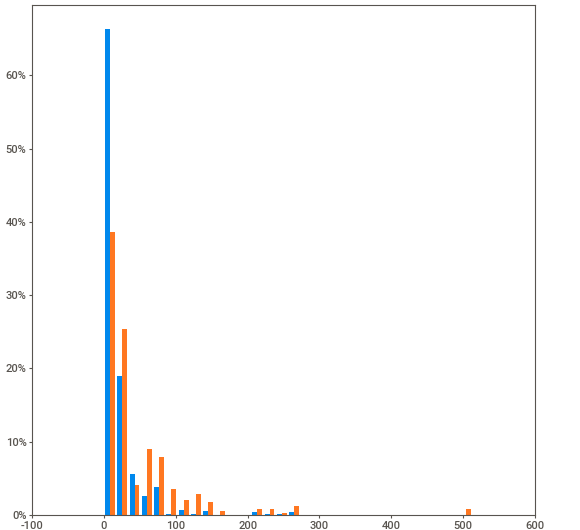
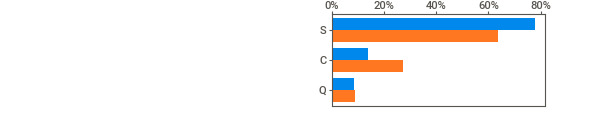
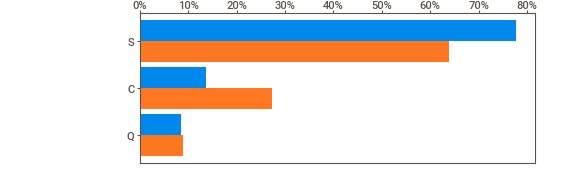
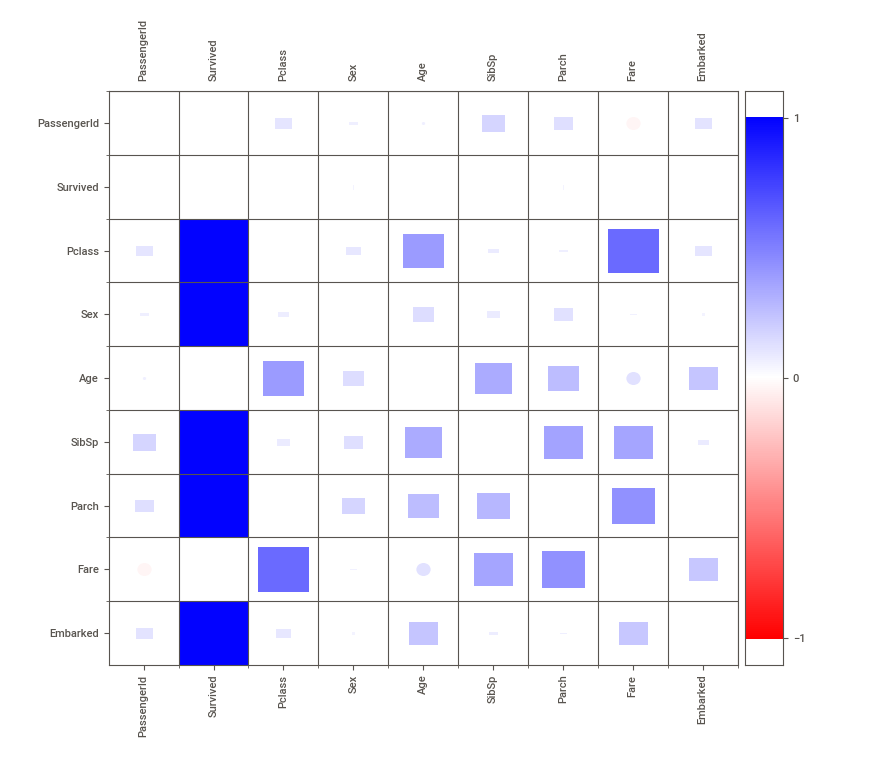
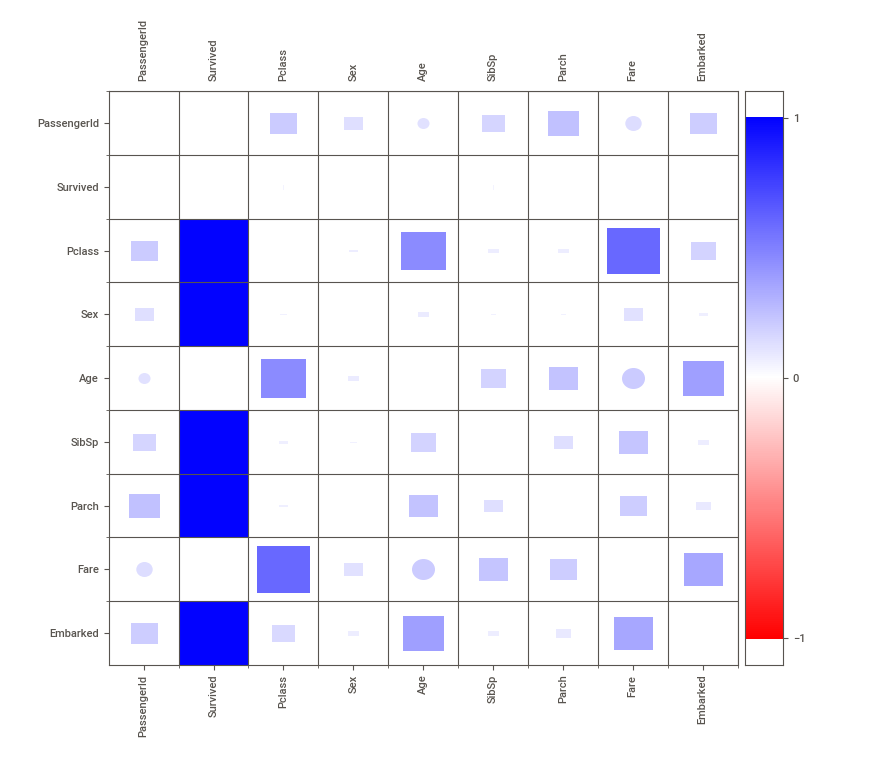

In [ ]:
import IPython
IPython.display.HTML(filename='/content/SWEETVIZ_REPORT.html')

## Uma solução básica baseada em uma heurística: "toda mulher sobrevive, todo homem não sobrevive"
 


In [ ]:
teste1 = titanic['Sex'].map({'male': 0, 'female': 1})
teste1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
# acuracia da heuristia
(teste1 == titanic['Survived']).mean()

0.7867564534231201

Mini-exercício: teste o desempenho da heurística: "*mulheres e crianças sobrevivem, o restante não*".

## **Pré-processamento para Machine Learning**

Precisamos escolher quais variáveis utilizar, e deixá-las todas em formato numérico, deixando assim apropriado para utilizar os modelos de Machine Learning

Vamos descartar as seguintes variáveis:

- PassengerID: é apenas o ID do usuário, não nenhuma informação nela.
- Nome: que informação pode estar contida no nome de uma pessoa?
- Ticket: pelo que vimos, é apenas um número associado ao ticket, sem um padrão muito bem definido.
- Cabin: pelo fato de que há muito missing data nessa variável.

## Descarte de variáveis não importantes

In [ ]:
# dropando as variaveis de interesse em cada conjunto de dados
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
teste.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


---

## Dados incompletos ou faltantes

In [ ]:
import missingno as msno

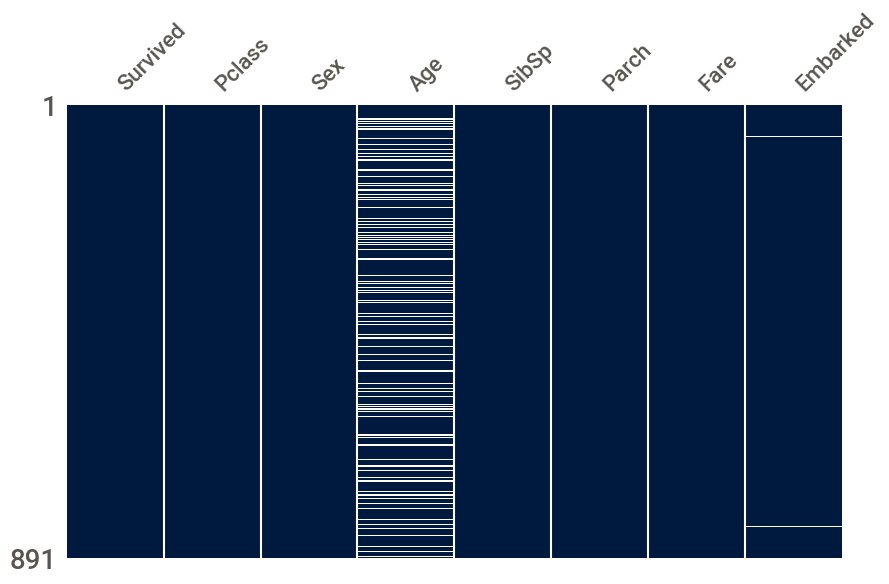

In [ ]:
msno.matrix(titanic, figsize = (10, 6), color = (0, 0.1, 0.25), sparkline = False);

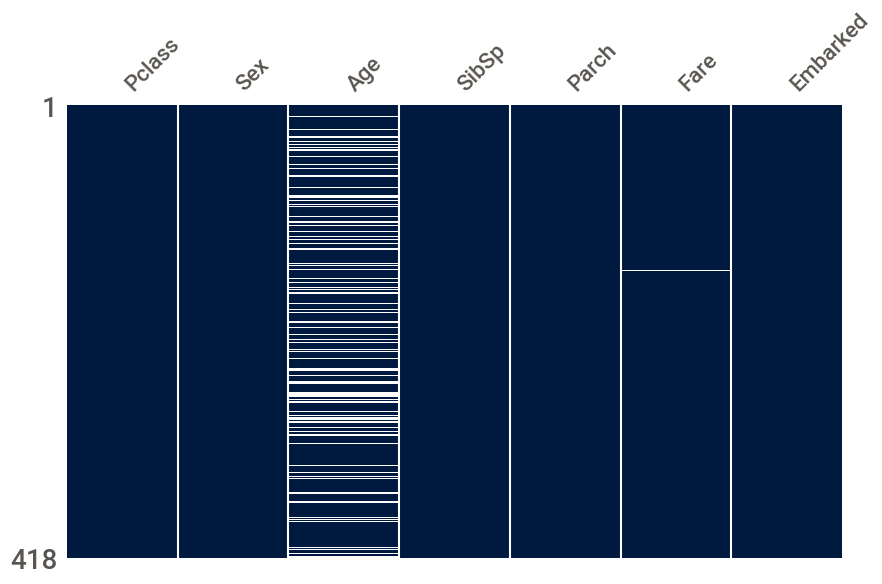

In [ ]:
msno.matrix(teste, figsize = (10, 6), color = (0, 0.1, 0.25), sparkline = False);

In [ ]:
titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [ ]:
teste.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
dtype: float64

In [ ]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
med_age = titanic['Age'].median()
med_fare = titanic['Fare'].median()
moda_emb = titanic['Embarked'].mode()[0]

In [ ]:
titanic['Age'] = titanic['Age'].fillna(med_age)
titanic['Fare'] = titanic['Fare'].fillna(med_fare)
titanic['Embarked'] = titanic['Embarked'].fillna(moda_emb)
    
teste['Age'] = teste['Age'].fillna(med_age)
teste['Fare'] = teste['Fare'].fillna(med_fare)
teste['Embarked'] = teste['Embarked'].fillna(moda_emb)

In [ ]:
titanic.isnull().mean()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [ ]:
teste.isnull().mean()

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

## Codificar variáveis categóricas

In [ ]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
teste['Sex'] = teste['Sex'].map({'male': 0, 'female': 1})

In [ ]:
pd.get_dummies(titanic['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
enc = OneHotEncoder()


In [ ]:
enc.fit_transform(titanic[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
pd.get_dummies(titanic[['Embarked']])#, drop_first = True)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Embarked', 'Pclass'])#, drop_first = True)

In [ ]:
teste = pd.get_dummies(teste, columns = ['Embarked', 'Pclass'])#, drop_first = True)

In [ ]:
titanic.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [ ]:
teste.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,34.5,0,0,7.8292,0,1,0,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,0,1


## Mudar a escala das variáveis contínuas
 



In [ ]:
titanic['Fare']    

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
aux0 = sc.fit_transform(titanic[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
titanic = pd.concat([titanic, aux1], axis = 1)
titanic.drop(['Age', 'Fare'], axis = 1, inplace = True) 

In [ ]:
aux0 = sc.transform(teste[['Age', 'Fare']])
aux1 = pd.DataFrame(aux0, columns = ['Idade', 'Tarifa'])
teste = pd.concat([teste, aux1], axis = 1)
teste.drop(['Age', 'Fare'], axis = 1, inplace = True) 

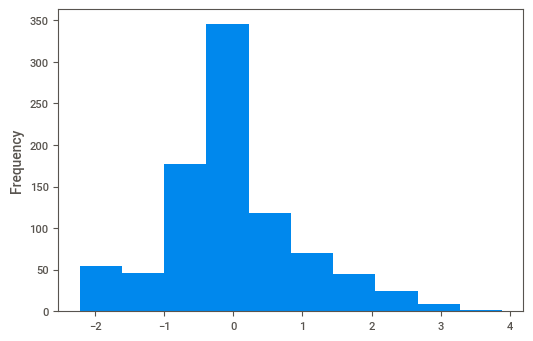

In [ ]:
titanic['Idade'].plot(kind = 'hist')

# **CENÁRIO 1**: Nesse ponto, temos os conjuntos pré-processados, prontos para passar para a etapa de Machine Learning. Mas será que isso é tudo que podemos fazer?
 



In [ ]:
# reservando para um momento posterior
titanic1 = titanic.copy()
teste1 = teste.copy()

---

 ## Engenharia de Variáveis
 



Tamanho da família

In [ ]:
titanic['Familia'] = titanic['SibSp'] + titanic['Parch'] + 1
teste['Familia'] = teste['SibSp'] + teste['Parch'] + 1

In [ ]:
def aux(x):
    if x == 1:
        return 1
    else:
        return 0

titanic['Sozinho'] = titanic['Familia'].apply(aux)
teste['Sozinho'] = teste['Familia'].apply(aux)

In [ ]:
teste.sample(10)

,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Familia,Sozinho
233,0,0,0,0,1,0,0,0,1,-0.104637,-0.489776,1,1
317,0,0,0,0,0,1,0,1,0,-0.796286,-0.437007,1,1
337,0,0,2,1,0,0,0,0,1,0.740711,-0.502864,3,0
286,0,0,0,0,0,1,0,0,1,-0.104637,-0.502445,1,1
44,1,1,0,0,0,1,1,0,0,1.201810,0.409741,2,0
0,0,0,0,0,1,0,0,0,1,0.394887,-0.490783,1,1
178,1,0,3,0,0,1,0,1,0,0.510161,0.136831,4,0
209,0,0,0,0,0,1,0,0,1,-0.335187,-0.489442,1,1
388,0,0,0,0,1,0,0,0,1,-0.642586,-0.492378,1,1
109,0,0,0,0,0,1,0,1,0,-0.834711,-0.386671,1,1


In [ ]:
titanic['Sozinho'].groupby(titanic['Survived']).mean()

Survived
0    0.681239
1    0.476608
Name: Sozinho, dtype: float64

In [ ]:
titanic.drop(['SibSp', 'Parch', 'Familia'], axis = 1, inplace = True)
teste.drop(['SibSp', 'Parch', 'Familia'], axis = 1, inplace = True)


In [ ]:
titanic.sample(10)

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho
274,1,1,0,1,0,0,0,1,-0.104637,-0.492378,1
399,1,1,0,0,1,0,1,0,-0.104637,-0.393718,1
56,1,1,0,0,1,0,1,0,-0.642586,-0.437007,1
606,0,0,0,0,1,0,0,1,0.049062,-0.489442,1
323,1,1,0,0,1,0,1,0,-0.565736,-0.064516,0
639,0,0,0,0,1,0,0,1,-0.104637,-0.324253,0
525,0,0,0,1,0,0,0,1,0.855986,-0.492378,1
786,1,1,0,0,1,0,0,1,-0.873136,-0.497496,1
495,0,0,1,0,0,0,0,1,-0.104637,-0.357308,1
303,1,1,0,1,0,0,1,0,-0.104637,-0.399758,1


## Utilizando a variável 'Name'

Veja que há um padrão no formato dos nomes: é sempre o sobrenome, seguido de uma vírgula, depois a **titulação da pessoa**, e em seguida vem o primeiro nome. A titulação da pessoa pode ser uma variável preditora importante nesse problema. Vamos transformar essa variável em algo mais tratável:


In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv' 
nome = pd.read_csv(url, usecols = ['Name'] )  
nome.head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [ ]:
nome.iloc[0,0].split(', ')[1].split('. ')[0]

'Mr'

In [ ]:
titulacao = []
for i in range(nome.shape[0]):
    titulacao.append(nome.iloc[i,0].split(', ')[1].split('. ')[0])

In [ ]:
titanic['Titulo'] = titulacao

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,Mr
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,Mrs
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,Miss
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,Mrs
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,Mr


In [ ]:
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.00,0.0,0.00,1.0
Miss,182.0,0.697802,0.460477,0.0,0.00,1.0,1.00,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.00,1.0,1.00,1.0
Master,40.0,0.575000,0.500641,0.0,0.00,1.0,1.00,1.0
Dr,7.0,0.428571,0.534522,0.0,0.00,0.0,1.00,1.0
Rev,6.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Major,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Col,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0
Mlle,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/train.csv' 
nome = pd.read_csv(url, usecols = ['Name'] )   

titulacao = []
for i in range(nome.shape[0]):
    titulacao.append(nome.iloc[i,0].split(', ')[1].split('. ')[0])

tt = []
for i in range(nome.shape[0]):
    if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
        tt.append(titulacao[i])
    else:
        tt.append('Outros')

titanic['Titulo'] = tt

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,Mr
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,Mrs
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,Miss
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,Mrs
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,Mr


In [ ]:
titanic['Survived'].groupby(titanic['Titulo']).describe().sort_values(by = 'count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
Titulo,,,,,,,,
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Miss,182.0,0.697802,0.460477,0.0,0.0,1.0,1.0,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.0,1.0,1.0,1.0
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Outros,27.0,0.444444,0.506370,0.0,0.0,0.0,1.0,1.0


In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
nome = pd.read_csv(url, usecols = ['Name'] )   

titulacao = []
for i in range(nome.shape[0]):
    titulacao.append(nome.iloc[i,0].split(', ')[1].split('. ')[0])

tt = []
for i in range(nome.shape[0]):
    if titulacao[i] in ['Mr', 'Miss', 'Mrs', 'Master']:
        tt.append(titulacao[i])
    else:
        tt.append('Outros')

teste['Titulo'] = tt

In [ ]:
teste.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo
0,0,0,1,0,0,0,1,0.394887,-0.490783,1,Mr
1,1,0,0,1,0,0,1,1.355510,-0.507479,0,Mrs
2,0,0,1,0,0,1,0,2.508257,-0.453367,1,Mr
3,0,0,0,1,0,0,1,-0.181487,-0.474005,1,Mr
4,1,0,0,1,0,0,1,-0.565736,-0.401017,0,Mrs


In [ ]:
titanic = pd.get_dummies(titanic, columns = ['Titulo'])#, drop_first = True)

In [ ]:
titanic.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,0,0,1,0,0
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,0,1,0,0,0
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,0,0,1,0,0


In [ ]:
teste = pd.get_dummies(teste, columns = ['Titulo'])#, drop_first = True)

In [ ]:
teste.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,1,0,0,0,1,0.394887,-0.490783,1,0,0,1,0,0
1,1,0,0,1,0,0,1,1.355510,-0.507479,0,0,0,0,1,0
2,0,0,1,0,0,1,0,2.508257,-0.453367,1,0,0,1,0,0
3,0,0,0,1,0,0,1,-0.181487,-0.474005,1,0,0,1,0,0
4,1,0,0,1,0,0,1,-0.565736,-0.401017,0,0,0,0,1,0


---

## **Cenário 2**: Pré-processamento adicional

In [ ]:
titanic2 = titanic.copy()
teste2 = teste.copy()

---

## **Modelos de Machine Learning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:

# separando as variáveis explicativas da variavel resposta
X = titanic.drop('Survived', axis = 1)
Y = titanic['Survived']

# validação cruzada Leave One Out
kf = StratifiedKFold(n_splits = 10)

### Regressão Logística 

# verificando a performance da Regressão Logística

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1'] 

modelo = LogisticRegression()
accs_vc = cross_validate(modelo, X, Y, cv = kf, scoring = lista_de_medidas)
 

In [ ]:
accs_vc

{'fit_time': array([0.06187248, 0.0220139 , 0.01904035, 0.01880789, 0.01805067,
        0.01896524, 0.02023244, 0.01904845, 0.02055407, 0.01742125]),
 'score_time': array([0.0064137 , 0.00612712, 0.00604343, 0.00630116, 0.00610137,
        0.00605583, 0.0063653 , 0.00679564, 0.00621009, 0.00624156]),
 'test_accuracy': array([0.78888889, 0.83146067, 0.7752809 , 0.86516854, 0.80898876,
        0.78651685, 0.7752809 , 0.7752809 , 0.83146067, 0.85393258]),
 'test_balanced_accuracy': array([0.77532468, 0.82433155, 0.74518717, 0.86283422, 0.80614973,
        0.75989305, 0.76203209, 0.74518717, 0.8131016 , 0.8494709 ]),
 'test_f1': array([0.72463768, 0.7826087 , 0.67741935, 0.82857143, 0.76056338,
        0.6984127 , 0.70588235, 0.67741935, 0.76923077, 0.81690141]),
 'test_precision': array([0.73529412, 0.77142857, 0.75      , 0.80555556, 0.72972973,
        0.75862069, 0.70588235, 0.75      , 0.80645161, 0.80555556]),
 'test_recall': array([0.71428571, 0.79411765, 0.61764706, 0.85294118, 0.7

In [ ]:
accs_vc['test_accuracy']

array([0.78888889, 0.83146067, 0.7752809 , 0.86516854, 0.80898876,
       0.78651685, 0.7752809 , 0.7752809 , 0.83146067, 0.85393258])

In [ ]:
#accs_vc['test_score'].mean()
print(accs_vc['test_accuracy'].mean())
print(accs_vc['test_recall'].mean())
print(accs_vc['test_precision'].mean())
print(accs_vc['test_balanced_accuracy'].mean())
print(accs_vc['test_f1'].mean())

0.8092259675405742
0.7307563025210084
0.7618518185416046
0.7943512152335682
0.7441647124377481


In [ ]:
# verificando a performance da Regressão Logística
def MachineLearning(dataset):

    X = dataset.drop('Survived', axis = 1)
    y = dataset['Survived']

    lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

    nome_das_medidas = ['acurácia', 'sensibilidade', 'vpp', 'eficiência', 'f1-score']

    lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 4),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 4)]

    nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (prof = 3, mf = 3)',
                        'Random Forest (prof = 3, mf = 4)',
                        'Random Forest (prof = 6, mf = 3)',
                        'Random Forest (prof = 6, mf = 4)']

    resultados0 = {}

    for i in range(len(lista_de_modelos)):
        print('Rodando modelo: ' + nome_dos_modelos[i])
        accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = kf, scoring = lista_de_medidas)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
    resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

    return resultados
    

In [ ]:
titanic1.head()

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa
0,0,0,1,0,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,0,1,0,0,0.663861,0.786845
2,1,1,0,0,0,0,1,0,0,1,-0.258337,-0.488854
3,1,1,1,0,0,0,1,1,0,0,0.433312,0.420730
4,0,0,0,0,0,0,1,0,0,1,0.433312,-0.486337


In [ ]:
titanic2.head()

,Survived,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Idade,Tarifa,Sozinho,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Outros
0,0,0,0,0,1,0,0,1,-0.565736,-0.502445,0,0,0,1,0,0
1,1,1,1,0,0,1,0,0,0.663861,0.786845,0,0,0,0,1,0
2,1,1,0,0,1,0,0,1,-0.258337,-0.488854,1,0,1,0,0,0
3,1,1,0,0,1,1,0,0,0.433312,0.420730,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0.433312,-0.486337,1,0,0,1,0,0


In [ ]:
MachineLearning(titanic1)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (prof = 3, mf = 3)
Rodando modelo: Random Forest (prof = 3, mf = 4)
Rodando modelo: Random Forest (prof = 6, mf = 3)
Rodando modelo: Random Forest (prof = 6, mf = 4)


,acurácia,sensibilidade,vpp,eficiência,f1-score
Regressão Logística,0.799126,0.698655,0.761100,0.725533,0.780153
Árvore (prof = 3),0.815930,0.704370,0.794742,0.742515,0.794761
Árvore (prof = 5),0.800300,0.663697,0.785589,0.714782,0.774441
Árvore (prof = 7),0.822797,0.684202,0.828666,0.745618,0.796528
5-NN,0.805855,0.719412,0.762317,0.737985,0.789571
15-NN,0.785680,0.646723,0.760100,0.695777,0.759590
25-NN,0.800300,0.655210,0.791310,0.714529,0.772992
Bagging,0.814869,0.716218,0.788530,0.745903,0.796224
"Random Forest (prof = 3, mf = 3)",0.806991,0.587815,0.865410,0.698129,0.765692
"Random Forest (prof = 3, mf = 4)",0.821586,0.614370,0.885659,0.722384,0.782606


In [ ]:
MachineLearning(titanic2)

Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (prof = 3, mf = 3)
Rodando modelo: Random Forest (prof = 3, mf = 4)
Rodando modelo: Random Forest (prof = 6, mf = 3)
Rodando modelo: Random Forest (prof = 6, mf = 4)


,acurácia,sensibilidade,vpp,eficiência,f1-score
Regressão Logística,0.809226,0.730756,0.761852,0.744165,0.794351
Árvore (prof = 3),0.823795,0.724706,0.797993,0.756111,0.804979
Árvore (prof = 5),0.818290,0.713866,0.789429,0.746145,0.798633
Árvore (prof = 7),0.821610,0.710672,0.799609,0.749897,0.800656
5-NN,0.817079,0.736807,0.776977,0.753587,0.801922
15-NN,0.804782,0.672605,0.789316,0.722389,0.779804
25-NN,0.800337,0.631681,0.809406,0.706370,0.768467
Bagging,0.810362,0.719328,0.774590,0.742110,0.793216
"Random Forest (prof = 3, mf = 3)",0.796854,0.710420,0.746177,0.726075,0.780513
"Random Forest (prof = 3, mf = 4)",0.799089,0.716218,0.747514,0.729707,0.783412


## **Submetendo uma predição no Kaggle**

In [ ]:
# modelo Random Forest com max_depth = 8
def Submissao(treino, teste, modelo, nome = 'submissaoKaggle'):

    X = treino.drop('Survived', axis = 1)
    y = treino['Survived']
 
    modelo.fit(X, y)
    pred = modelo.predict(teste)

    url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Titanic/test.csv' 
    subm = pd.read_csv(url, usecols = ['PassengerId'] )  
    subm['Survived'] = pred
    
    subm.to_csv(nome + '.csv', index = False)  



In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 6, max_features = 4)
#arvore = DecisionTreeClassifier(max_depth = 5)

Submissao(titanic1, teste1, modelo = rf, nome = 'SubmissaoRF-setup1')
Submissao(titanic2, teste2, modelo = rf, nome = 'SubmissaoRF-setup2') 

#veja os arquivos gerados na aba da esquerda

# **Pergunto: o que podemos fazer para melhorar ainda mais a acurácia da nossa modelagem?**

## **Exercício**

a) Submeta uma predição no kaggle utilizando uma combinação de modelos 'hard'.

b) Explore outros cenários de pré-processamento

---